<a href="https://colab.research.google.com/github/meiladrahmani556/Disso/blob/main/notebooks/03_cleaning_and_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Standard imports
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Paths
DATA_DIR = "../data"

In [19]:
!mkdir -p /content/data
!kaggle datasets download -d puneet6060/intel-image-classification -p /content/data --unzip

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 92% 318M/346M [00:03<00:00, 69.9MB/s]
100% 346M/346M [00:03<00:00, 93.5MB/s]


In [ ]:
%%writefile kaggle.json
{
  "username": "meiladrahmani",
  "key": "KGAT_92da668157bd4281a45c8eb0fec30e6f"
}

Writing kaggle.json


In [ ]:
!mkdir -p /root/.config/kaggle
!cp kaggle.json /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

!kaggle datasets list | head

ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                          Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        256  1.0              
kundanbedmutha/exam-score-prediction-dataset                      Exam Score Prediction Dataset                           325454  2025-11-28 07:29:01.047000           5863        288  1.0              
dansbecker/melbourne-housing-snapshot                             Melbourne Housing Snapshot                              461423  2018-06-05 12:52:24.087000         200095       1721  0.705882

In [ ]:
# Standard imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reproducibility
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Data paths
DATA_DIR = "../data"
TRAIN_DIR = os.path.join(DATA_DIR, "seg_train", "seg_train")
TEST_DIR  = os.path.join(DATA_DIR, "seg_test", "seg_test")

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [20]:
import os

# Candidate base folders (common in Colab)
candidates = [
    "/content/data",
    "/content/../data",
    "../data",
    "/content",
]

def find_base_dir():
    for base in candidates:
        # Case A: dataset directly contains seg_train/seg_test
        if os.path.exists(os.path.join(base, "seg_train")) and os.path.exists(os.path.join(base, "seg_test")):
            return base
        # Case B: dataset inside intel-image-classification folder
        nested = os.path.join(base, "intel-image-classification")
        if os.path.exists(os.path.join(nested, "seg_train")) and os.path.exists(os.path.join(nested, "seg_test")):
            return nested
    return None

BASE_DIR = find_base_dir()
print("Detected BASE_DIR:", BASE_DIR)

if BASE_DIR is None:
    raise FileNotFoundError(
        "Could not find dataset folders. Make sure you downloaded and unzipped the Kaggle dataset in this session."
    )

# Some versions of this dataset have seg_train/seg_test nested again
TRAIN_DIR = os.path.join(BASE_DIR, "seg_train")
TEST_DIR  = os.path.join(BASE_DIR, "seg_test")

if os.path.exists(os.path.join(TRAIN_DIR, "seg_train")):
    TRAIN_DIR = os.path.join(TRAIN_DIR, "seg_train")
if os.path.exists(os.path.join(TEST_DIR, "seg_test")):
    TEST_DIR = os.path.join(TEST_DIR, "seg_test")

print("TRAIN_DIR:", TRAIN_DIR, "exists?", os.path.exists(TRAIN_DIR))
print("TEST_DIR :", TEST_DIR,  "exists?", os.path.exists(TEST_DIR))
print("Train dir sample:", os.listdir(TRAIN_DIR)[:10])
print("Test dir sample :", os.listdir(TEST_DIR)[:10])


Detected BASE_DIR: /content/data
TRAIN_DIR: /content/data/seg_train/seg_train exists? True
TEST_DIR : /content/data/seg_test/seg_test exists? True
Train dir sample: ['sea', 'forest', 'glacier', 'mountain', 'street', 'buildings']
Test dir sample : ['sea', 'forest', 'glacier', 'mountain', 'street', 'buildings']


In [21]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    seed=SEED
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    seed=SEED
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [22]:
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 3000 images belonging to 6 classes.


In [23]:
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

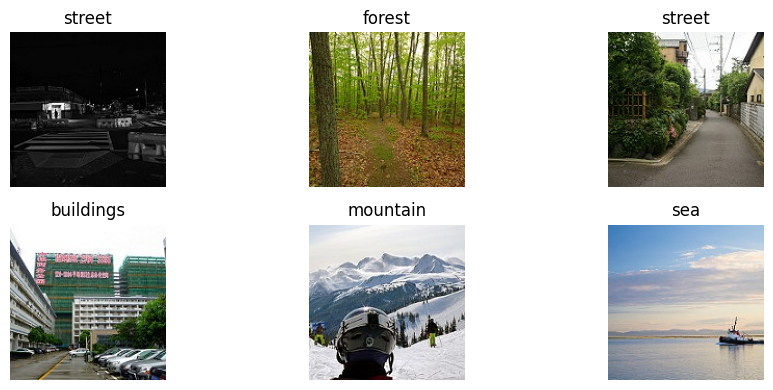

In [24]:
images, labels = next(train_generator)

plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(list(train_generator.class_indices.keys())[np.argmax(labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
## Dataset Cleaning and Splitting

Images are normalised by rescaling pixel values to the range [0, 1]. The training dataset is split into training (80%) and validation (20%) subsets using Keras ImageDataGenerator. The test dataset is kept separate and is not used during training. This ensures unbiased evaluation of model performance.
